<ipython-input-1-758ce355ba9c>:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[columns_to_scale] = transformer.transform(training_data[columns_to_scale])


Epoch 0, Loss: 0.8041
Epoch 100, Loss: 0.0920
Epoch 200, Loss: 0.0835
Epoch 300, Loss: 0.0762
Epoch 400, Loss: 0.0681
Epoch 500, Loss: 0.0537
Epoch 600, Loss: 0.0211
Epoch 700, Loss: 0.0108
Epoch 800, Loss: 0.0077
Epoch 900, Loss: 0.0062
Epoch 1000, Loss: 0.0054
Epoch 1100, Loss: 0.0049
Epoch 1200, Loss: 0.0046
Epoch 1300, Loss: 0.0044
Epoch 1400, Loss: 0.0042
Epoch 1500, Loss: 0.0040
Epoch 1600, Loss: 0.0039
Epoch 1700, Loss: 0.0038
Epoch 1800, Loss: 0.0038
Epoch 1900, Loss: 0.0037
Epoch 2000, Loss: 0.0037
Epoch 2100, Loss: 0.0036
Epoch 2200, Loss: 0.0036
Epoch 2300, Loss: 0.0036
Epoch 2400, Loss: 0.0035
Epoch 2500, Loss: 0.0035
Epoch 2600, Loss: 0.0035
Epoch 2700, Loss: 0.0035
Epoch 2800, Loss: 0.0034
Epoch 2900, Loss: 0.0034
Epoch 3000, Loss: 0.0034
Epoch 3100, Loss: 0.0034
Epoch 3200, Loss: 0.0034
Epoch 3300, Loss: 0.0033
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
EarlyStopping counter: 4 out of 10
EarlyStopping counter:

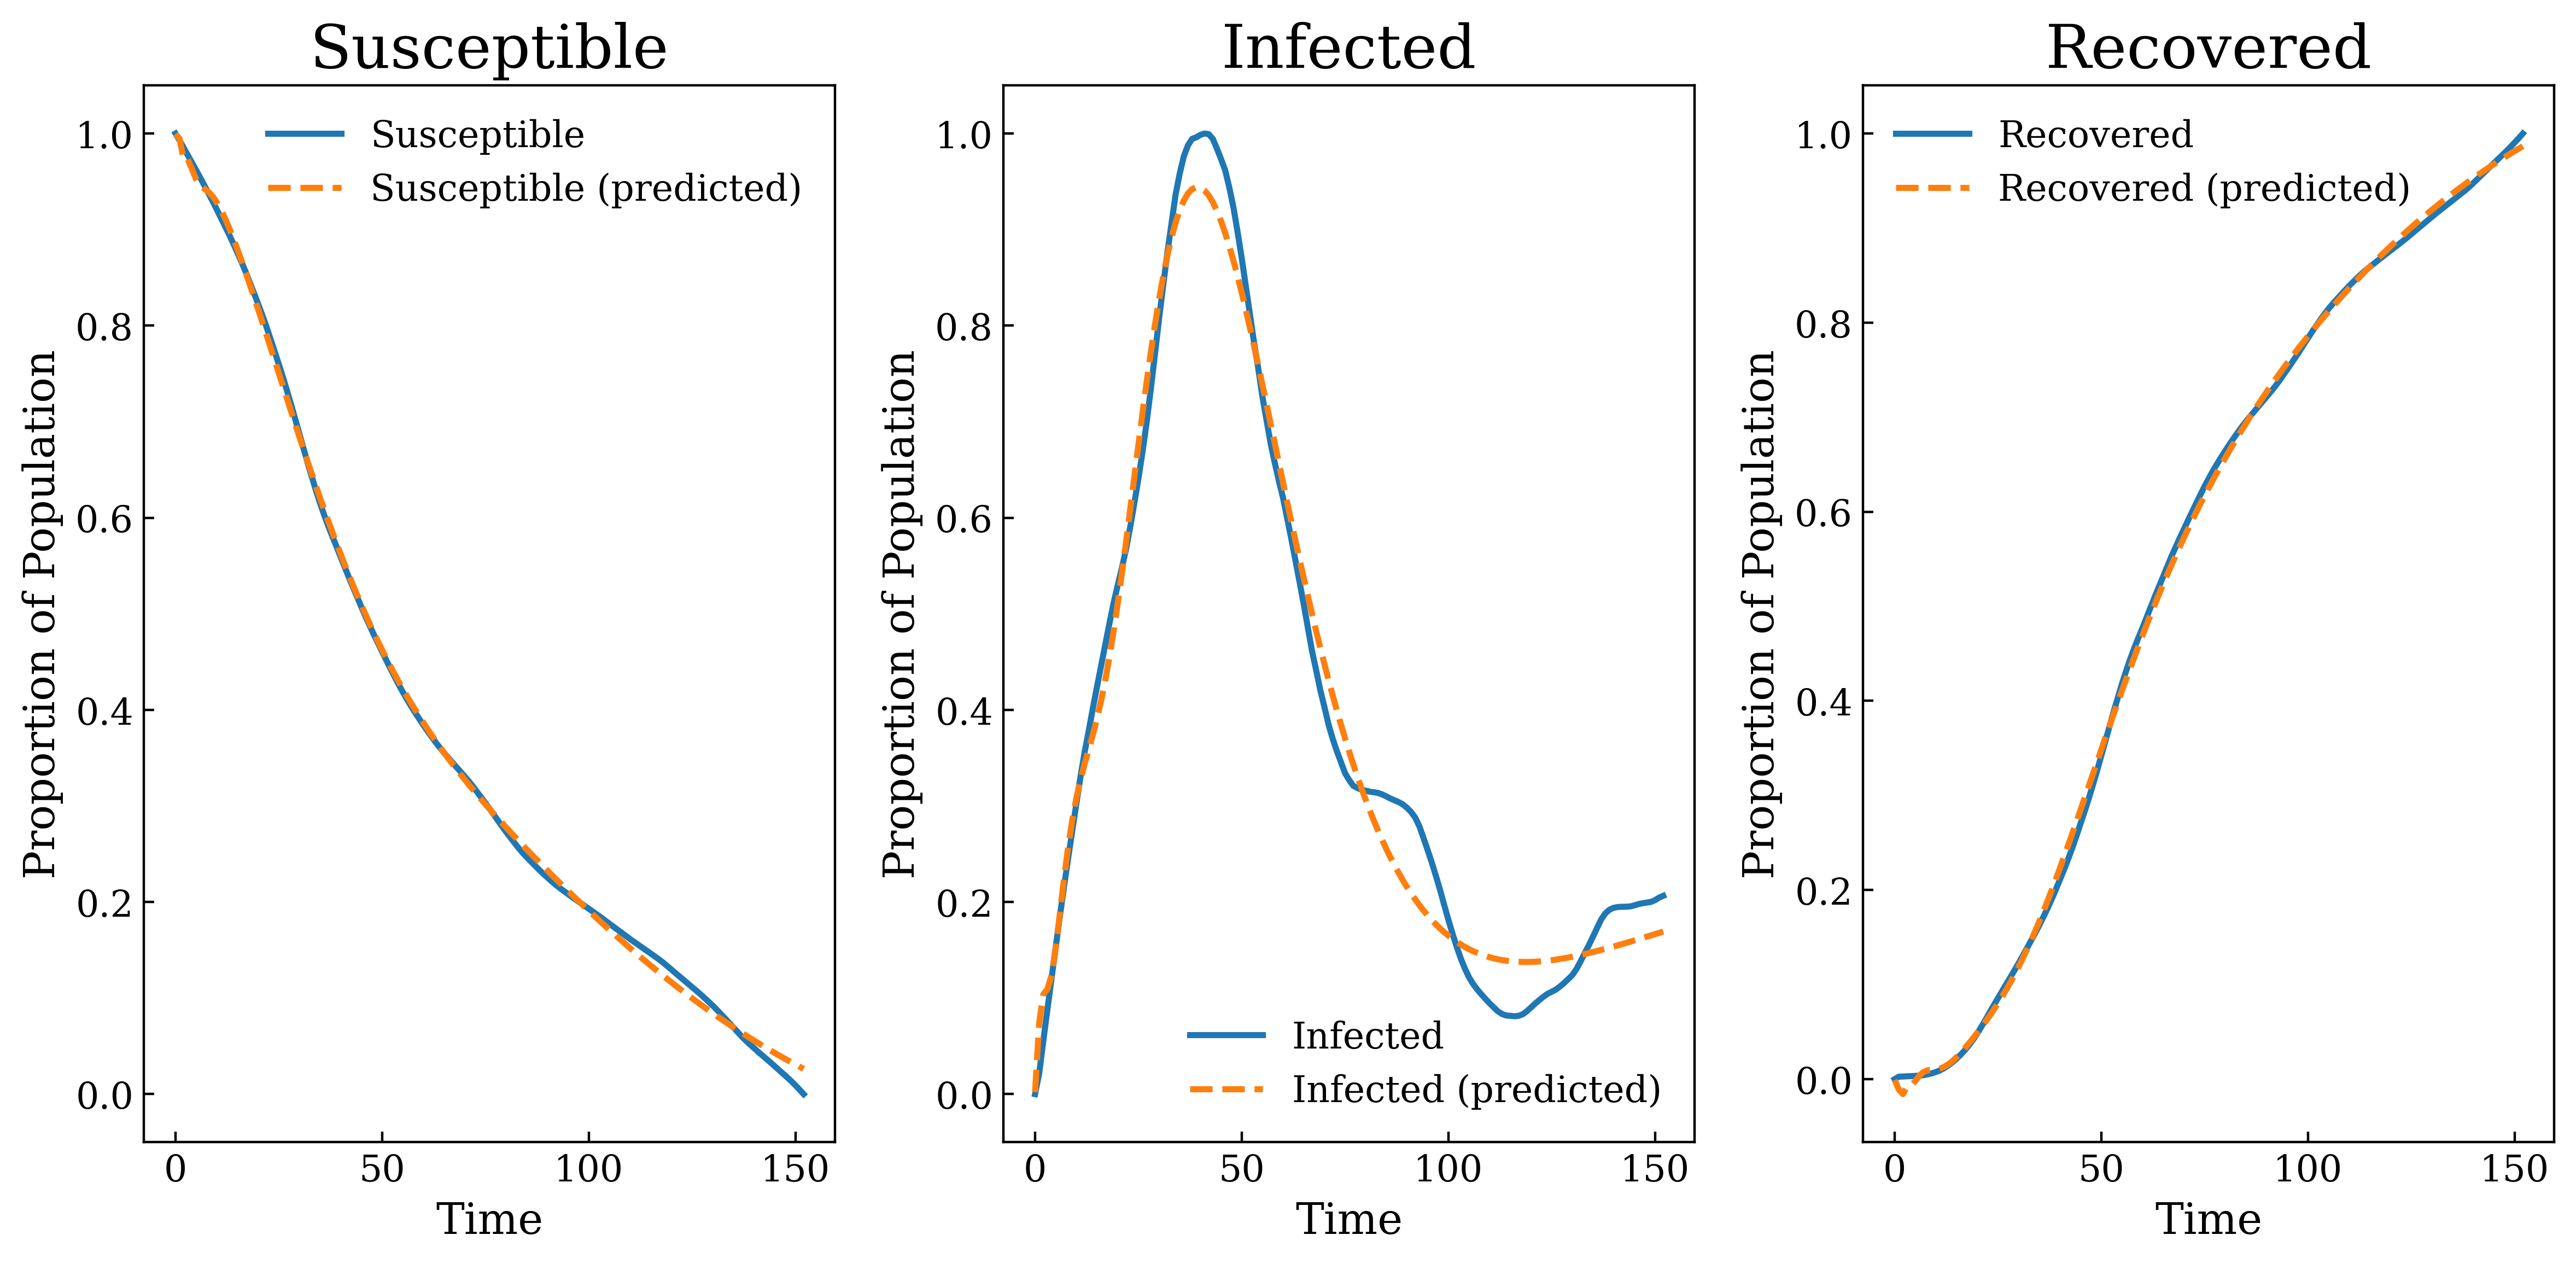

Plot saved to: ../../reports/figures/Forward Model Loss_loss.pdf


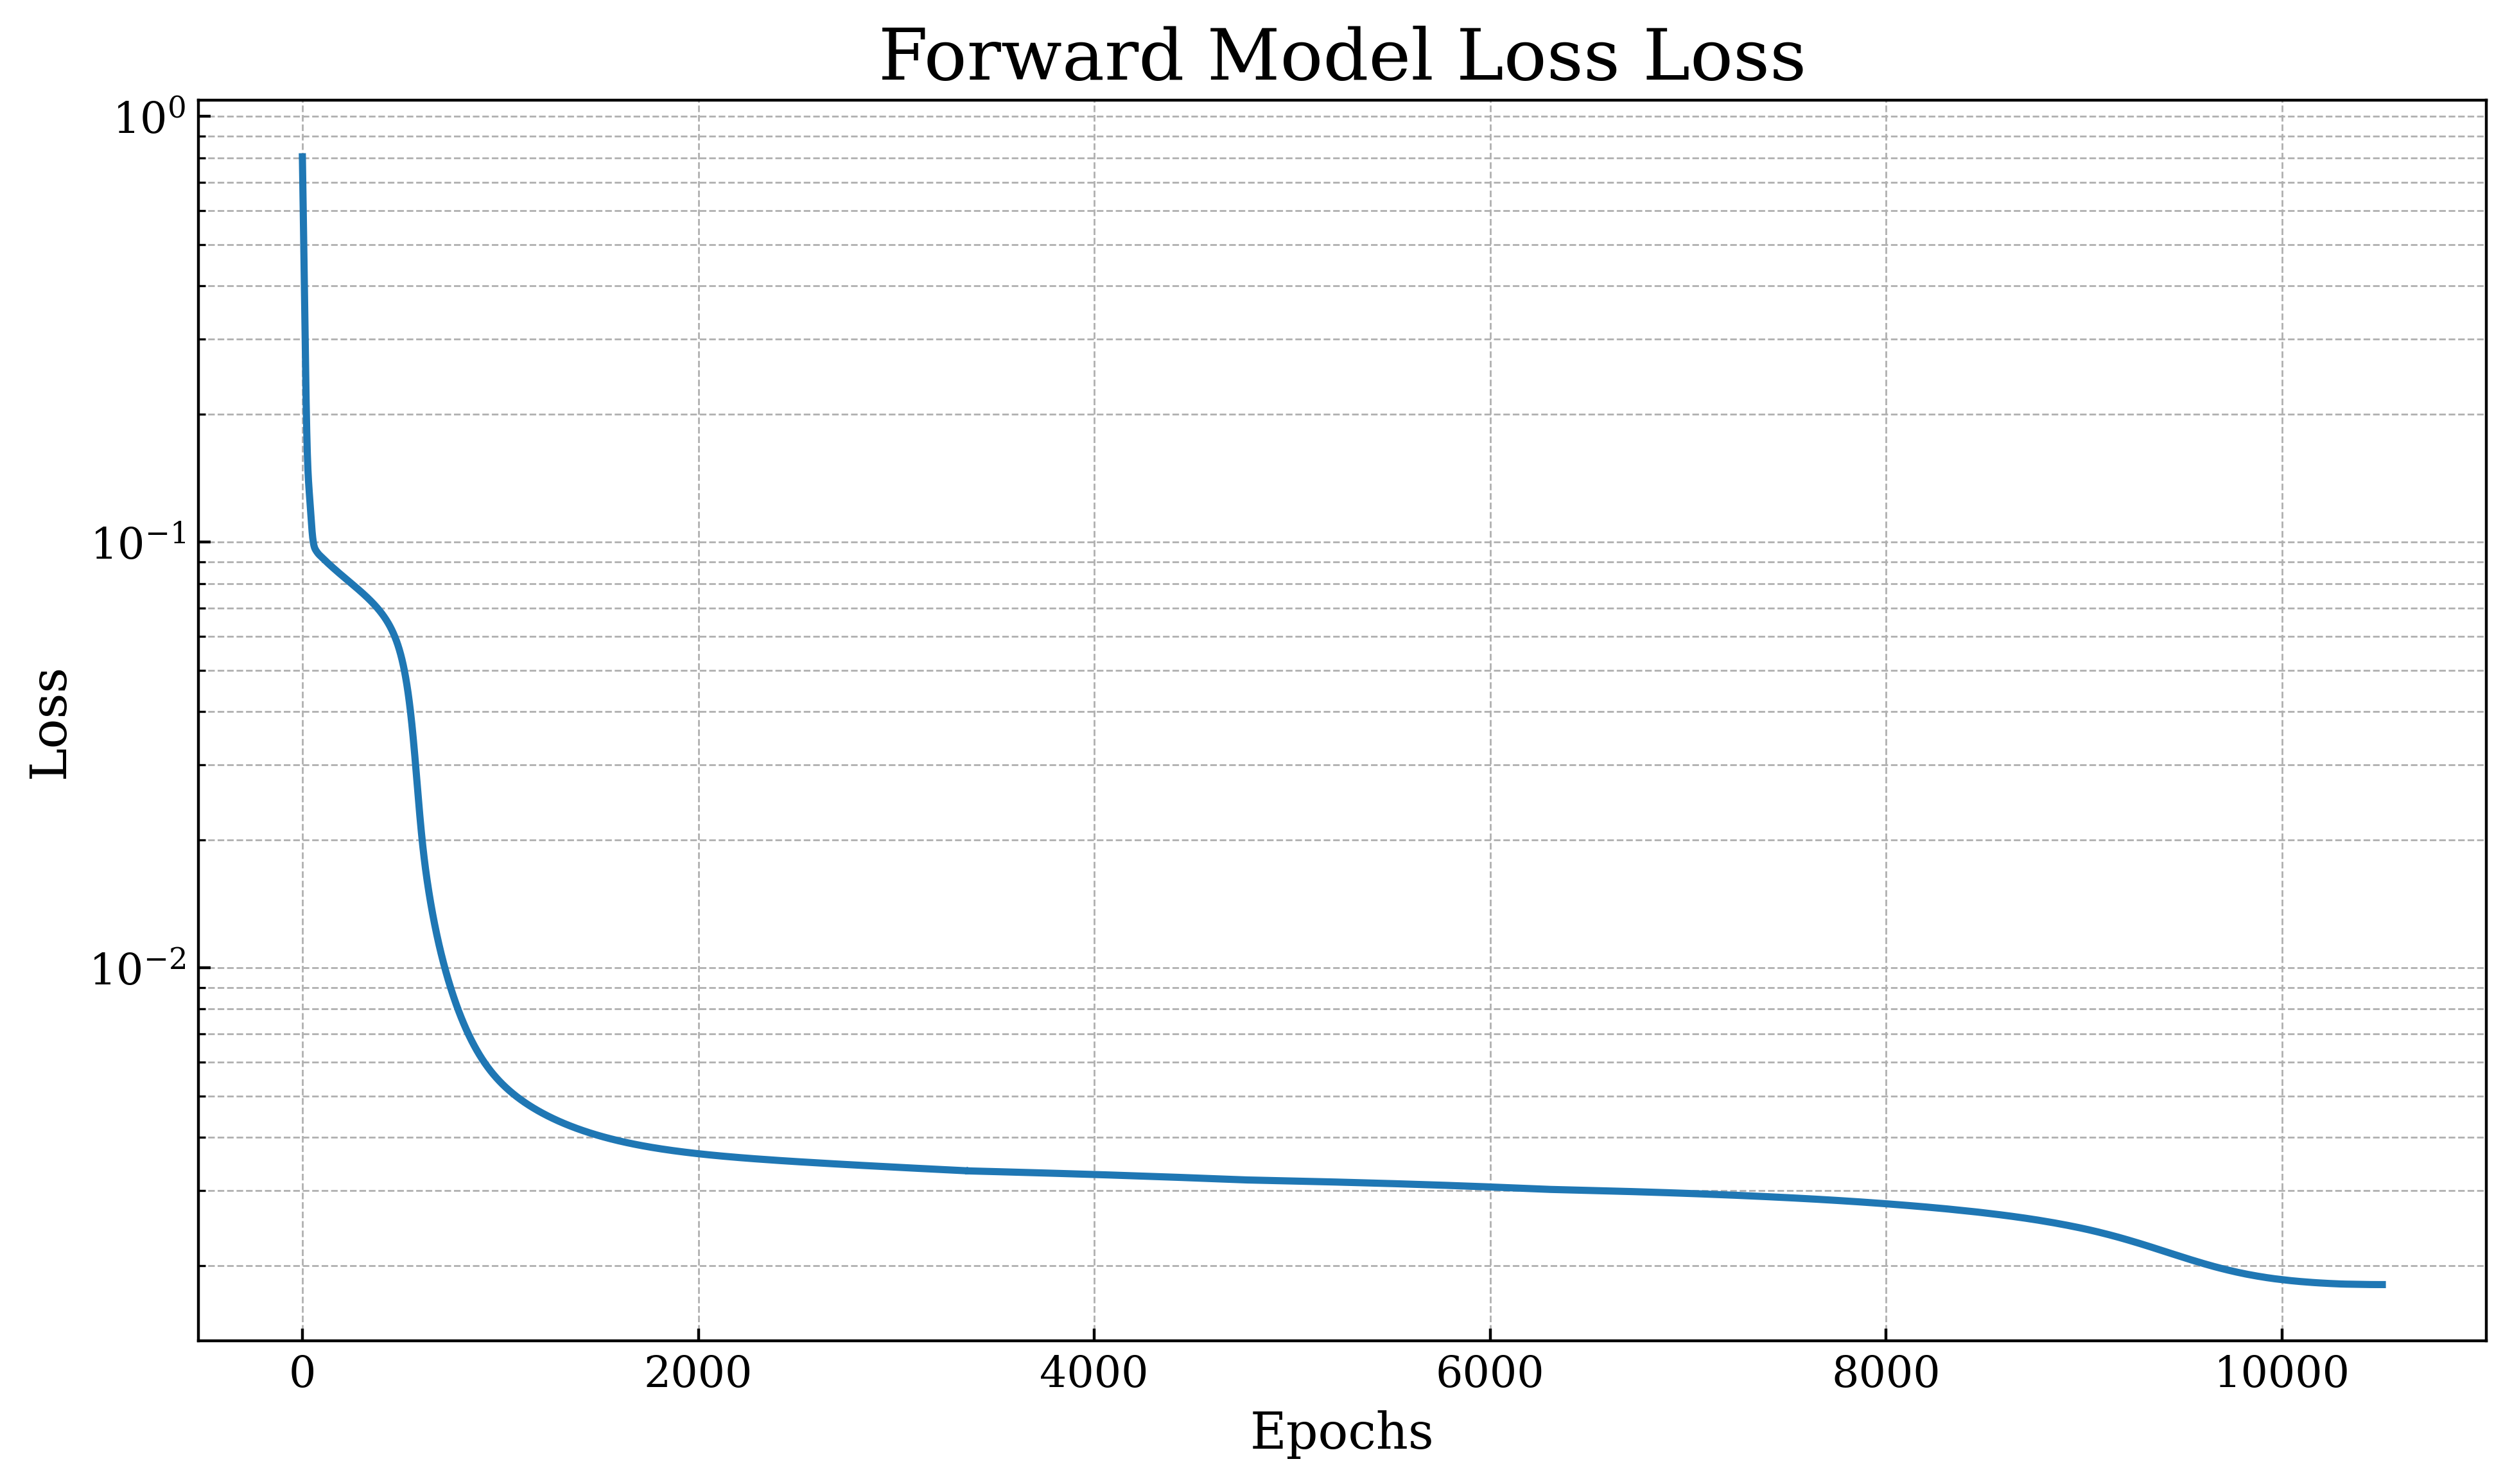

Epoch 0, Loss: 0.8041
Epoch 100, Loss: 0.0921
Epoch 200, Loss: 0.0836
Epoch 300, Loss: 0.0763
Epoch 400, Loss: 0.0682
Epoch 500, Loss: 0.0538
Epoch 600, Loss: 0.0212
Epoch 700, Loss: 0.0110
Epoch 800, Loss: 0.0078
Epoch 900, Loss: 0.0063
Epoch 1000, Loss: 0.0055
Epoch 1100, Loss: 0.0050
Epoch 1200, Loss: 0.0047
Epoch 1300, Loss: 0.0044
Epoch 1400, Loss: 0.0042
Epoch 1500, Loss: 0.0041
Epoch 1600, Loss: 0.0040
Epoch 1700, Loss: 0.0039
Epoch 1800, Loss: 0.0038
Epoch 1900, Loss: 0.0037
Epoch 2000, Loss: 0.0037
Epoch 2100, Loss: 0.0036
Epoch 2200, Loss: 0.0036
Epoch 2300, Loss: 0.0035
Epoch 2400, Loss: 0.0035
Epoch 2500, Loss: 0.0035
Epoch 2600, Loss: 0.0034
Epoch 2700, Loss: 0.0034
Epoch 2800, Loss: 0.0034
Epoch 2900, Loss: 0.0034
Epoch 3000, Loss: 0.0033
Epoch 3100, Loss: 0.0033
Epoch 3200, Loss: 0.0033
Epoch 3300, Loss: 0.0032
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
EarlyStopping counter: 4 out of 10
EarlyStopping counter:

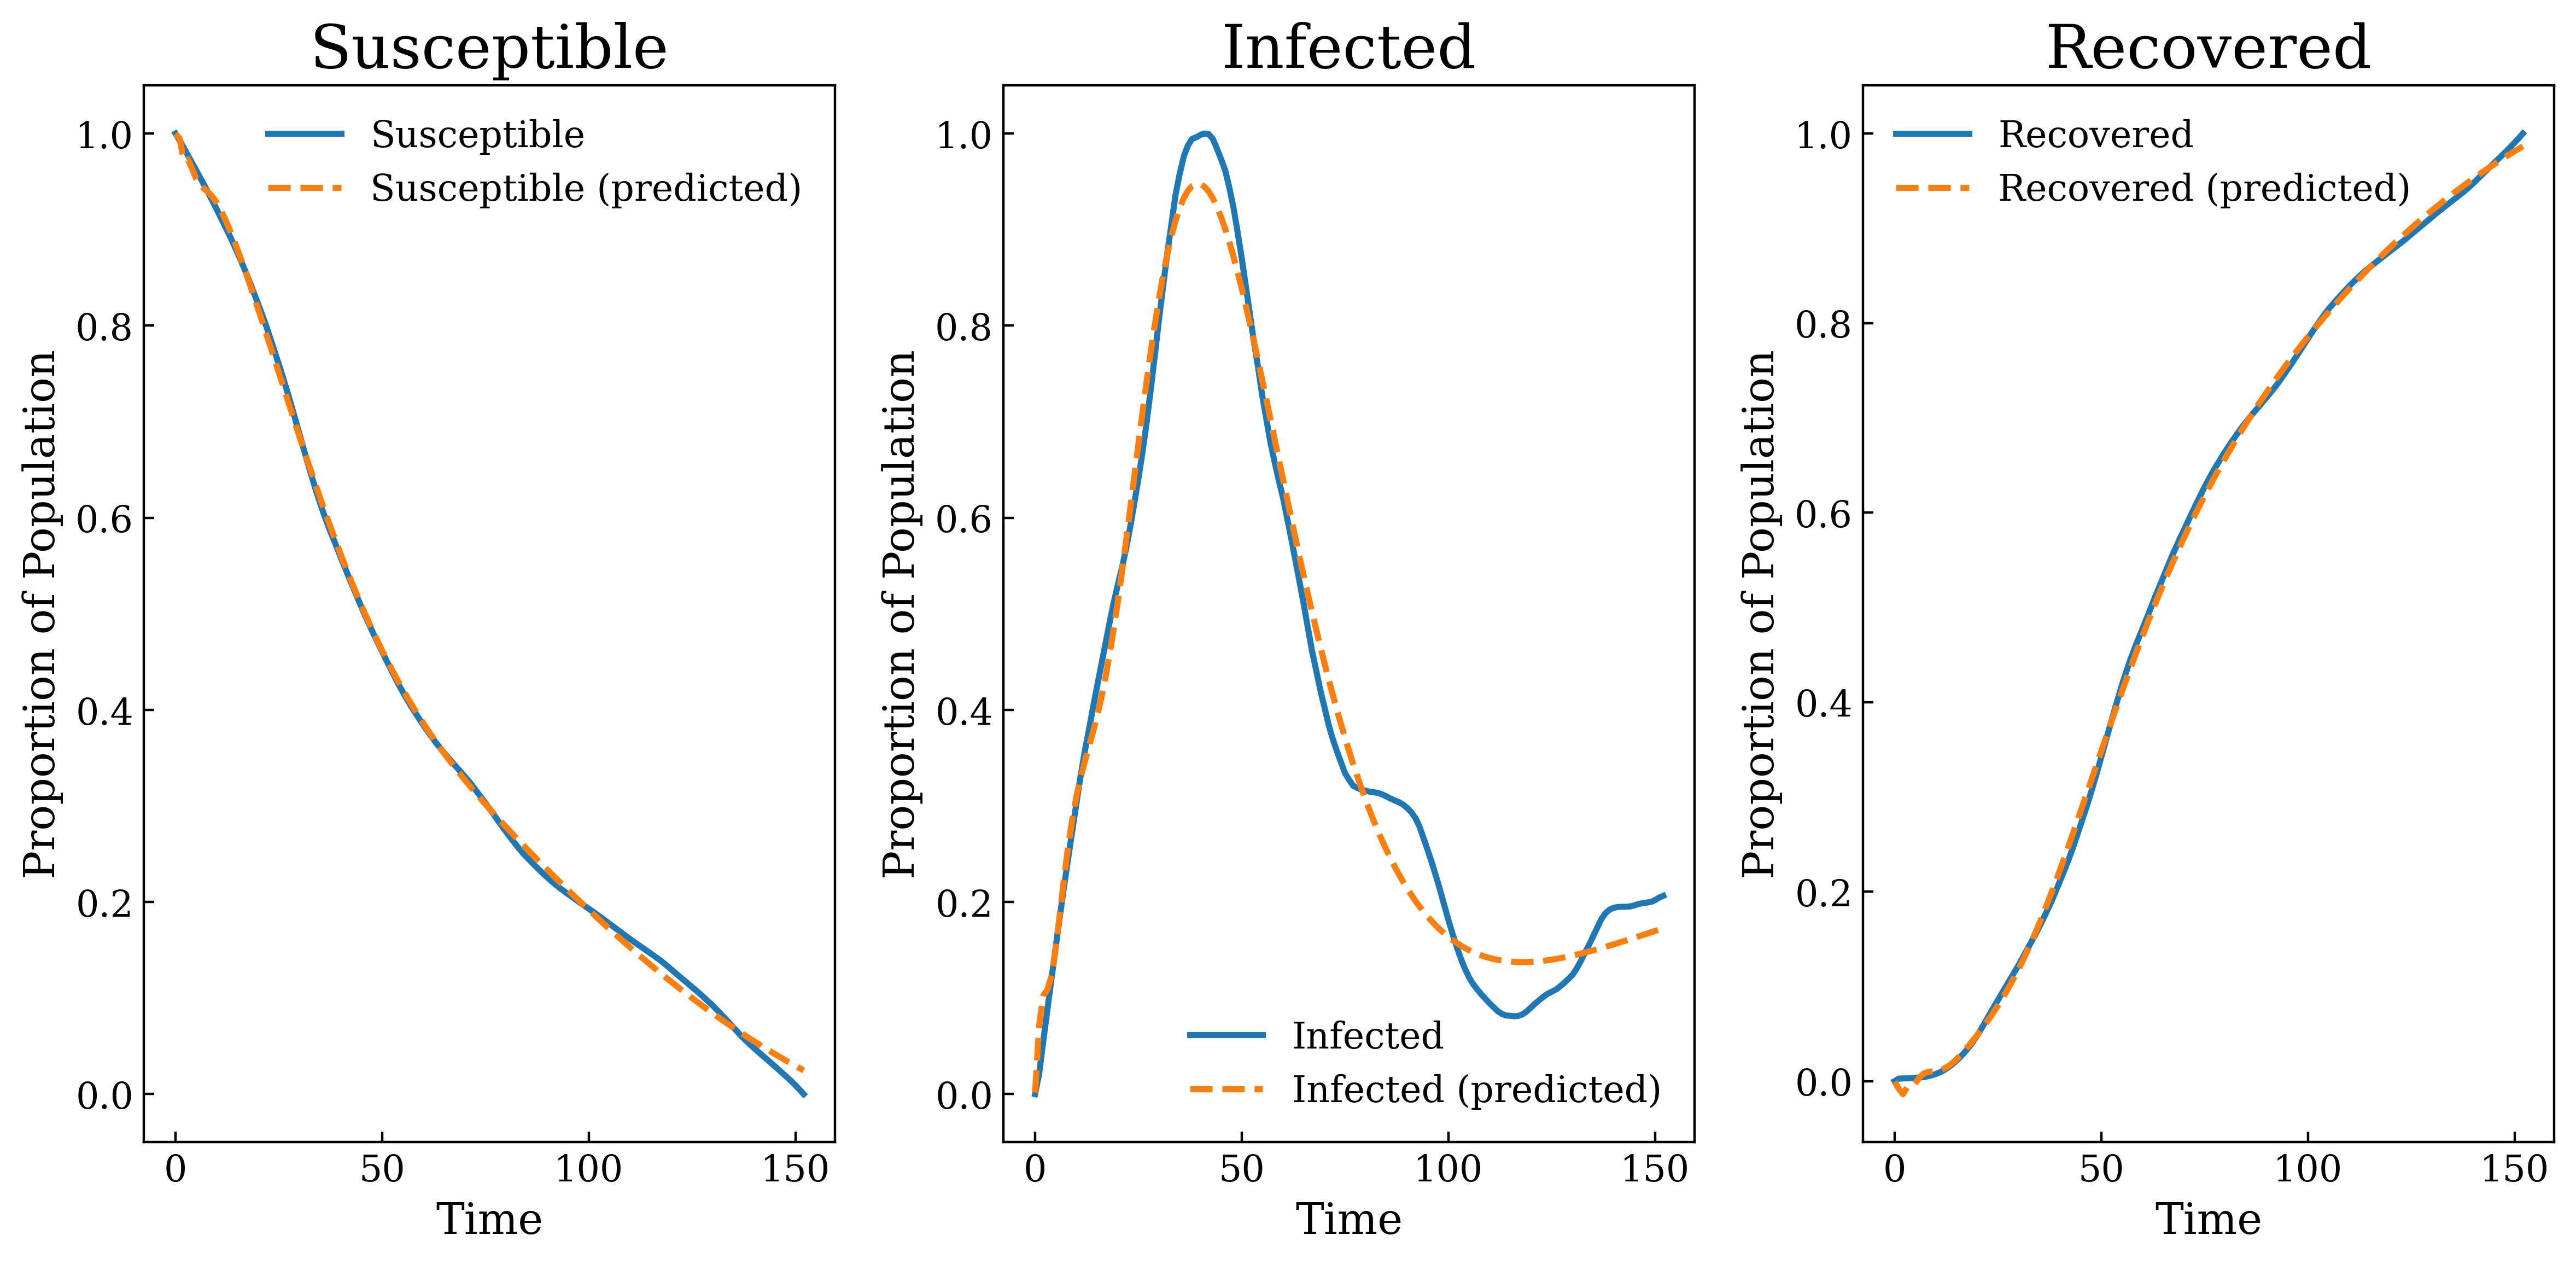

Plot saved to: ../../reports/figures/Inverse Model Loss_loss.pdf


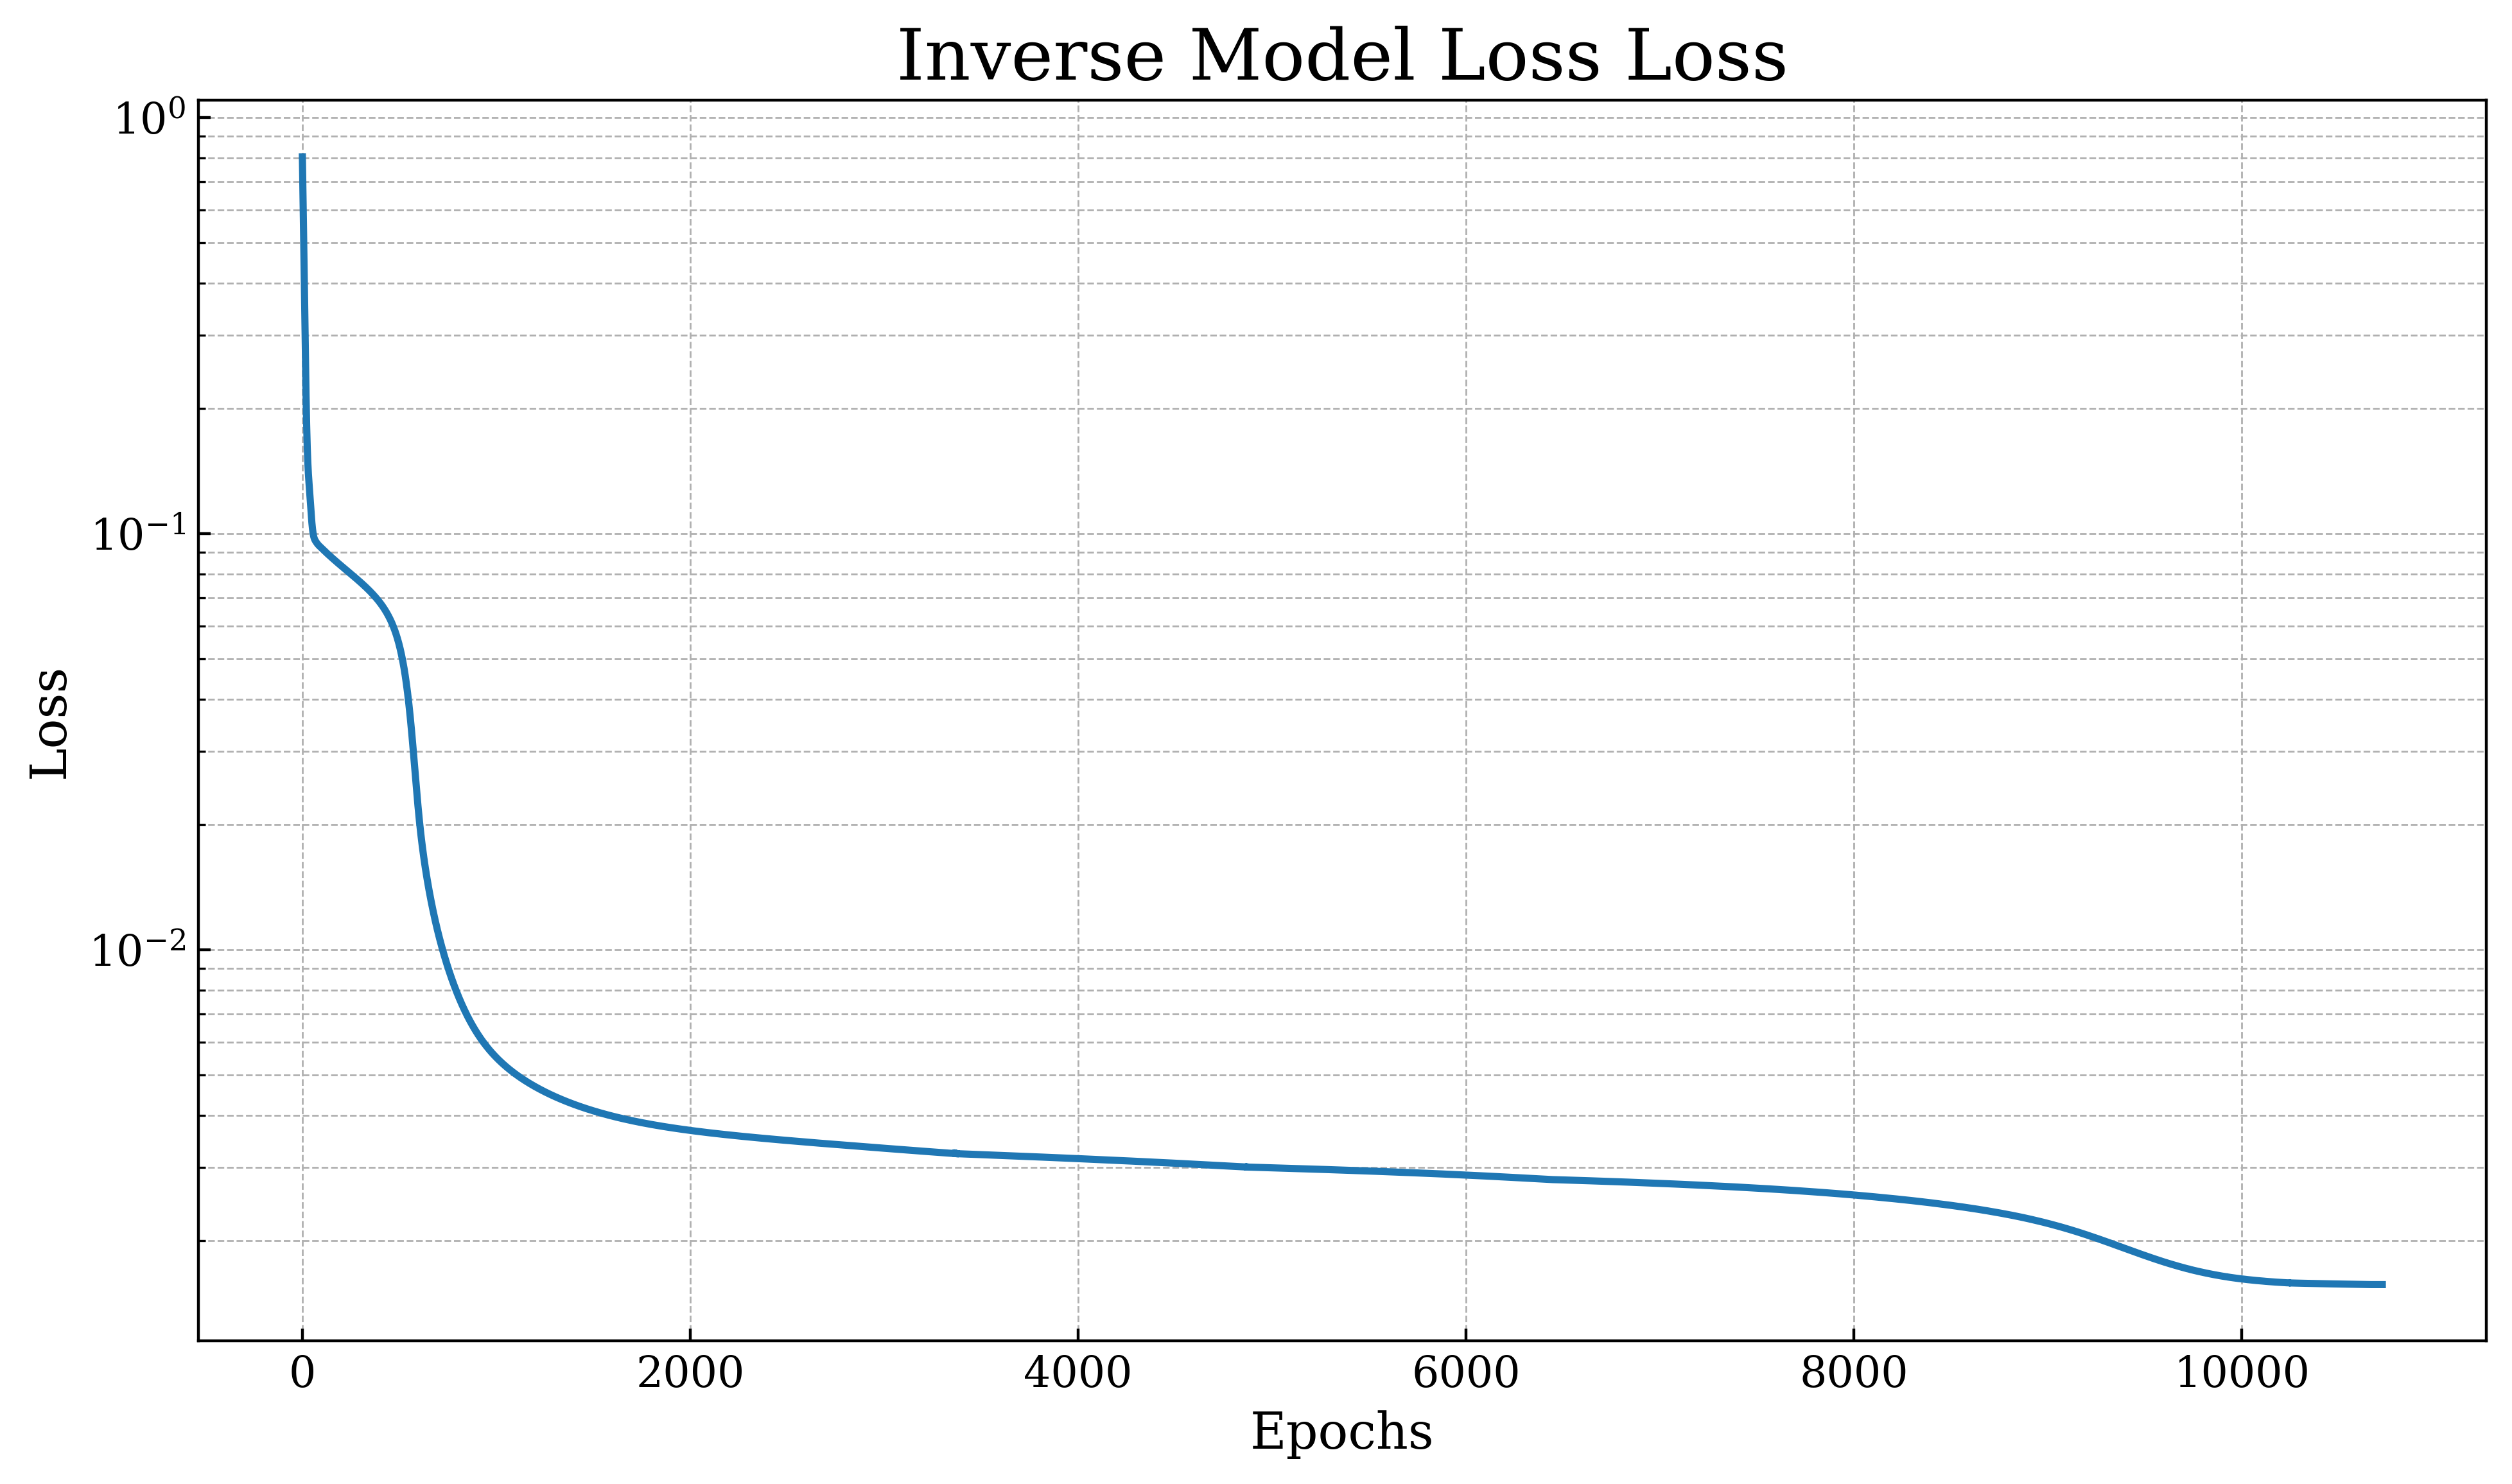

Predicted beta: 0.5781, Predicted gamma: 0.0440
MAE: 198.9805, MSE: 58059.0430, RMSE: 240.9544
MAE: 0.0153, MSE: 0.0006, RMSE: 0.0235


In [1]:
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler


# Set random seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Set the default style
# plt.style.use("fivethirtyeight")

plt.rcParams.update({
    # Font settings for clarity and compatibility with academic publications
    "font.family": "serif",  # Consistent font family
    # "font.serif": ["Times", "Computer Modern Roman"],  # Preferred serif fonts
    "font.size": 14,  # Base font size for better readability
    "text.usetex": False,  # Enable LaTeX for text rendering for a professional look

    # Figure aesthetics & size for detailed visuals and fit on publication pages
    "figure.figsize": (8, 5),  # Adjusted figure size for a balance between detail and fit
    "figure.facecolor": "white",  # White figure background for clean print
    "figure.autolayout": True,  # Enable automatic layout adjustments
    "figure.dpi": 400,  # High resolution figures
    "savefig.dpi": 400,  # High resolution saving settings
    "savefig.format": "pdf",  # Save figures in PDF format for publications
    "savefig.bbox": "tight",  # Tight bounding box around figures

    # Axes aesthetics for clarity and precision
    "axes.labelsize": 14,  # Clear labeling with larger font size
    "axes.titlesize": 20,  # Prominent titles for immediate recognition
    "axes.facecolor": "white",  # White axes background

    # Legend aesthetics for distinguishing plot elements
    "legend.fontsize": 12,  # Readable legend font size
    "legend.frameon": False,  # No frame around legend for cleaner look
    "legend.loc": "best",  # Optimal legend positioning

    # Line aesthetics for clear visual distinctions
    "lines.linewidth": 2,  # Thicker lines for visibility
    "lines.markersize": 8,  # Slightly smaller markers for balance

    # Tick label sizes for readability
    "xtick.labelsize": 12, 
    "ytick.labelsize": 12,
    "xtick.direction": "in",  # Ticks inside the plot
    "ytick.direction": "in",  # Ticks inside the plot
})


# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def load_and_preprocess_data(filepath, recovery_period=21, rolling_window=7, start_date="2020-04-01"):
    """
    Load and preprocess the COVID-19 dataset for the SIHCRD model.

    Parameters:
    - filepath: Path to the CSV file containing the data.
    - recovery_period: Assumed number of days for recovery. Defaults to 16 days.
    - rolling_window: Window size for rolling average calculation. Defaults to 7 days.
    - start_date: The start date for filtering the data. Format 'YYYY-MM-DD'.

    Returns:
    - A preprocessed pandas DataFrame suitable for SIHCRD model integration.
    """
    df = pd.read_csv(filepath)

    # Ensure the dataset has the required columns
    required_columns = [
        "date", "cumulative_confirmed", "cumulative_deceased",
        "population","new_confirmed",
            "new_deceased",
    ]
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")

    # Convert date to datetime and calculate days since start
    df["date"] = pd.to_datetime(df["date"])
    df["days_since_start"] = (df["date"] - pd.to_datetime(start_date)).dt.days

    # Apply rolling average
    for col in [
            "new_confirmed",
            "new_deceased",
            "cumulative_confirmed",
            "cumulative_deceased"]:
        df[col] = df[col].rolling(window=rolling_window, min_periods=1).mean().fillna(0)

    # Calculate recovered cases assuming a fixed recovery period
    df["recovered"] = df["cumulative_confirmed"].shift(recovery_period) - df["cumulative_deceased"].shift(recovery_period)
    df["recovered"] = df["recovered"].fillna(0).clip(lower=0)

    # Calculate active cases
    df["active_cases"] = df["cumulative_confirmed"] - df["recovered"] - df["cumulative_deceased"]

    # Estimate the susceptible population
    df["S(t)"] = df["population"] - df["active_cases"] - df["recovered"] - df["cumulative_deceased"]

    # Filter data based on the start date
    df = df[df["date"] >= pd.to_datetime(start_date)].reset_index(drop=True)

    # Ensure no negative values
    df[["recovered", "active_cases", "S(t)"]] = df[["recovered", "active_cases", "S(t)"]].clip(lower=0)

    return df



def get_region_name_from_filepath(filepath):

    base = os.path.basename(filepath)
    return os.path.splitext(base)[0]


path = "../../data/region_daily_data/Yorkshire and the Humber.csv"
region_name = get_region_name_from_filepath(path)
df = load_and_preprocess_data(f"../../data/region_daily_data/{region_name}.csv")

start_date = "2020-04-01"
end_date = "2020-08-31"
mask = (df["date"] >= start_date) & (df["date"] <= end_date)
training_data = df.loc[mask]

transformer = MinMaxScaler()

# Select the columns to scale
columns_to_scale = ["S(t)", "active_cases", "recovered"]

# Fit the scaler to the training data
transformer.fit(training_data[columns_to_scale])

# Transform the training data
training_data[columns_to_scale] = transformer.transform(training_data[columns_to_scale])


# Convert columns to tensors
S_data = (
    torch.tensor(training_data["S(t)"].values, dtype=torch.float32)
    .view(-1, 1)
    .to(device)
)
t_data = (
    torch.tensor(range(len(training_data)), dtype=torch.float32)
    .view(-1, 1)
    .requires_grad_(True)
    .to(device).requires_grad_(True)
)
I_data = (
    torch.tensor(training_data["active_cases"].values, dtype=torch.float32)
    .view(-1, 1)
    .to(device)
)
R_data = (
    torch.tensor(training_data["recovered"].values, dtype=torch.float32)
    .view(-1, 1)
    .to(device)
)
SIR_tensor = torch.cat([S_data, I_data, R_data], dim=1).to(device)


# SIR Neural Network Model
class SIRNet(nn.Module):
    def __init__(self, inverse=False, init_beta=None, init_gamma=None, retrain_seed=42, num_layers=4, hidden_neurons=20):
        super(SIRNet, self).__init__()
        self.retrain_seed = retrain_seed
        layers = []
        layers.append(nn.Linear(1, hidden_neurons))
        layers.append(nn.Tanh())
        for _ in range(num_layers - 1):
            layers.append(nn.Linear(hidden_neurons, hidden_neurons))
            layers.append(nn.Tanh())
        layers.append(nn.Linear(hidden_neurons, 3))
        self.net = nn.Sequential(*layers)

        # Adjustments for inverse model with customizable initial values
        if inverse:
            self._beta = nn.Parameter(torch.tensor([init_beta if init_beta is not None else torch.rand(1)], device=device), requires_grad=True)
            self._gamma = nn.Parameter(torch.tensor([init_gamma if init_gamma is not None else torch.rand(1)], device=device), requires_grad=True)
        else:
            self._beta = None
            self._gamma = None

        # Initialize the network weights
        self.init_xavier()

    def forward(self, t):
        return self.net(t)

    # Getter for beta to be between 0.1 and 1.0
    @property
    def beta(self):
        return torch.sigmoid(self._beta) * 0.9 + 0.1 if self._beta is not None else None

    # for gamma to be between 0.01 and 0.1
    @property
    def gamma(self):
        return torch.sigmoid(self._gamma) * 0.09 + 0.01 if self._gamma is not None else None
    

    # Initialize the neural network with Xavier Initialization
    def init_xavier(self):
        torch.manual_seed(self.retrain_seed)

        def init_weights(m):
            if isinstance(m, nn.Linear):
                g = nn.init.calculate_gain("tanh")
                nn.init.xavier_uniform_(m.weight, gain=g)
                if m.bias is not None:
                    m.bias.data.fill_(0)

        self.apply(init_weights)


# loss function for both forward and inverse problems
def sir_loss(model, model_output, SIR_tensor, t_tensor, N, beta=None, gamma=None):
    S_pred, I_pred, R_pred = model_output[:, 0], model_output[:, 1], model_output[:, 2]
    
    S_t = torch.autograd.grad(S_pred, t_tensor, torch.ones_like(S_pred), create_graph=True)[0]
    I_t = torch.autograd.grad(I_pred, t_tensor, torch.ones_like(I_pred), create_graph=True)[0]
    R_t = torch.autograd.grad(R_pred, t_tensor, torch.ones_like(R_pred), create_graph=True)[0]

    if beta is None:  # Use model's parameters for inverse problem
        beta, gamma = model.beta, model.gamma

    dSdt = -(beta * S_pred * I_pred) / N
    dIdt = (beta * S_pred * I_pred) / N - gamma * I_pred
    dRdt = gamma * I_pred

    loss = torch.mean((S_t - dSdt) ** 2) + torch.mean((I_t - dIdt) ** 2) + torch.mean((R_t - dRdt) ** 2)
    loss += torch.mean((model_output - SIR_tensor) ** 2)  # Data fitting loss
    return loss

# Early stopping class
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=3, verbose=False, delta=0):
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.counter = 0

    def __call__(self, val_loss):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0
            
def train(model, t_tensor, SIR_tensor, epochs=1000, lr=0.001, N=None, beta=None, gamma=None):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = ReduceLROnPlateau(optimizer, 'min', factor=0.5, patience=5)
    early_stopping = EarlyStopping(patience=10, verbose=True)
    
    losses = []
    
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        
        # Forward pass
        model_output = model(t_tensor)
        
        # Loss calculation
        loss = sir_loss(model, model_output, SIR_tensor, t_tensor, N, beta, gamma)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        scheduler.step(loss)
        
        # append the loss
        losses.append(loss.item())
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}")
        
        early_stopping(loss)
        if early_stopping.early_stop:
            print("Early stopping")
            
            #save the best model
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'loss': loss,
            }, f"../../models/{model.__class__.__name__}.pt")
            print("Model saved")
            break
        
    print("Training finished")
    
    return losses

# Adjusted plot_results function to match your request format
def plot_results(t, S, I, R, model, title):
    model.eval()
    with torch.no_grad():
        predictions = model(t).cpu().numpy()
    
    t_np = t.cpu().detach().numpy().flatten()
    fig, axs = plt.subplots(1, 3, figsize=(12, 6))
    
    for ax, data, pred, label in zip(axs, [S, I, R], predictions.T, ['Susceptible', 'Infected', 'Recovered']):
        ax.plot(t_np, data.cpu().detach().numpy().flatten(), label=f'{label}')
        ax.plot(t_np, pred, linestyle='dashed', label=f'{label} (predicted)')
        ax.set_title(f'{label}')
        ax.set_xlabel('Time')
        ax.set_ylabel('Proportion of Population')
        ax.legend()
    
    plt.tight_layout()
    plt.savefig(f"../../reports/figures/{title}.pdf")
    plt.show()
    

#function to plot the loss
def plot_loss(losses, title, save_path="../../reports/figures", show=True, figsize=(10, 6), log_scale=True, grid=True, save_format='pdf'):
    """
    Enhanced plotting function for the training loss of a model.

    Args:
    - losses (list or dict): A list of loss values per epoch, or a dictionary of lists for multiple loss components.
    - title (str): Title for the plot.
    - save_path (str, optional): Directory to save the plot. Default is "../../reports/figures".
    - show (bool, optional): Whether to display the plot. Default is True.
    - figsize (tuple, optional): Figure size. Default is (10, 6).
    - log_scale (bool, optional): Whether to use a logarithmic scale for the y-axis. Default is True.
    - grid (bool, optional): Whether to show grid lines. Default is True.
    - save_format (str, optional): Format to save the plot (e.g., 'pdf', 'png'). Default is 'pdf'.

    Returns:
    None
    """

    plt.figure(figsize=figsize)
    
    if isinstance(losses, dict):
        for label, loss_vals in losses.items():
            plt.plot(loss_vals, label=label)
    else:
        plt.plot(losses, label="Loss")
    
    if log_scale:
        plt.yscale('log')
    
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"{title} Loss")
    
    if grid:
        plt.grid(True, which="both", linestyle='--', linewidth=0.5)
    
    if isinstance(losses, dict):
        plt.legend()
    
    # Ensure save path exists
    os.makedirs(save_path, exist_ok=True)
    save_file = os.path.join(save_path, f"{title}_loss.{save_format}")
    plt.savefig(save_file)
    print(f"Plot saved to: {save_file}")
    
    if show:
        plt.show()
    else:
        plt.close()



# Train the forward problem
model_forward = SIRNet(num_layers=5, hidden_neurons=32)
model_forward.to(device)
losses = train(model_forward, t_data, SIR_tensor, epochs=20000, lr=0.0001, N=training_data["population"].iloc[0], beta=0.2, gamma=0.05)

plot_results(t_data, S_data, I_data, R_data, model_forward, "Forward Model Results")
plot_loss(losses, "Forward Model Loss")

# Train the inverse problem
model_inverse = SIRNet(inverse=True, init_beta=0.1, init_gamma=0.01, num_layers=5, hidden_neurons=32)
model_inverse.to(device)
losses = train(model_inverse, t_data, SIR_tensor, epochs=20000, lr=0.0001, N=training_data["population"].iloc[0])

plot_results(t_data, S_data, I_data, R_data, model_inverse, "Inverse Model Results")
plot_loss(losses, "Inverse Model Loss")

def extract_parameters(model):
    """Extract and print the beta and gamma values from the model."""
    try:
        beta_predicted = model.beta.item()
        gamma_predicted = model.gamma.item()
        print(f"Predicted beta: {beta_predicted:.4f}, Predicted gamma: {gamma_predicted:.4f}")
    except AttributeError:
        print("Model does not have the requested parameters.")

extract_parameters(model_inverse)

# Evaluate the model with the predicted parameters for the inverse problem with MAE, MSE, and RMSE using Sklearn
# Generate the predicted SIR data and convert the normalized data back to the original scale and evaluate the metrics

def evaluate_model(model, t_tensor, SIR_tensor, transformer):
    model.eval()
    with torch.no_grad():
        predictions = model(t_tensor).cpu().numpy()
    
    # Inverse transform the normalized data
    SIR_pred = transformer.inverse_transform(predictions)
    SIR_true = transformer.inverse_transform(SIR_tensor.cpu().numpy())
    
    mae = mean_absolute_error(SIR_true, SIR_pred)
    mse = mean_squared_error(SIR_true, SIR_pred)
    rmse = np.sqrt(mse)
    
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")
    return mae, mse, rmse

mae, mse, rmse = evaluate_model(model_inverse, t_data, SIR_tensor, transformer)

# evaluate the model without transforming the data back to the original scale
def evaluate_model(model, t_tensor, SIR_tensor):
    model.eval()
    with torch.no_grad():
        predictions = model(t_tensor).cpu().numpy()
    
    mae = mean_absolute_error(SIR_tensor.cpu().numpy(), predictions)
    mse = mean_squared_error(SIR_tensor.cpu().numpy(), predictions)
    rmse = np.sqrt(mse)
    
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")
    return mae, mse, rmse

mae, mse, rmse = evaluate_model(model_inverse, t_data, SIR_tensor)

# from ann_visualizer.visualize import ann_viz

# ann_viz(model_forward, title="Forward Model Architecture", view=True)